## Recurrent Neural Network (RNN)

**What are Recurrent Neural Networks (RNNs)?**
* RNNs are a type of artificial neural network that can remember past information thanks to an internal memory.

* They are used in real-world applications like Apple's Siri and Google’s voice search, as well as for stock prediction, text generation, speech transcription, and machine translation.

**Key Differences from Traditional Neural Networks:**
* In traditional networks (like feedforward networks), inputs and outputs are independent.

* In RNNs, the output depends on previous inputs (past information matters).

* Weights are shared across all time steps in RNNs, while traditional networks have different weights for each layer.

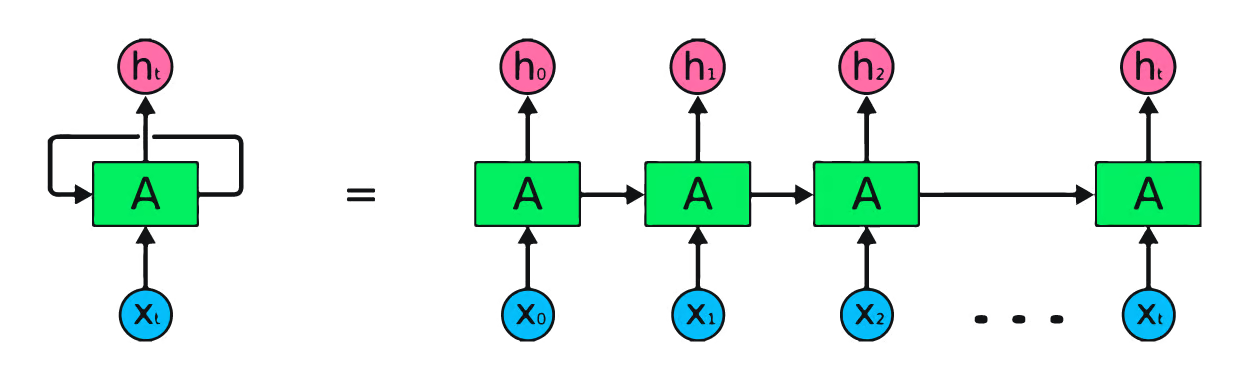

**How RNNs Work:**
* Each input (like a stock price) is fed into the network one by one.

* The middle layer (hidden layer) loops over time, reusing the same parameters (weights and biases).

* The current output depends on both the current input and previous inputs.

* Training RNNs uses a special method called Backpropagation Through Time (BPTT), which adjusts the shared weights based on the errors over all the time steps.
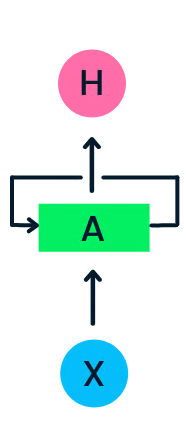


**Types of Recurrent Neural Networks (RNNs)**
* `Feedforward networks` have a fixed input and output size (one input → one output).

* `RNNs are flexible` — they can handle variable-length inputs and outputs, which makes them powerful for tasks like music generation, sentiment analysis, and machine translation.

There are _four main types_ of RNN structures:


| Type          | Description | Example |
|---------------|-------------|---------|
| **One-to-One** | Single input → Single output | Simple classification |
| **One-to-Many** | Single input → Multiple outputs | Image captioning |
| **Many-to-One** | Multiple inputs → Single output | Sentiment classification (text → emotion) |
| **Many-to-Many** | Multiple inputs → Multiple outputs | Machine translation (English sentence → French sentence) |

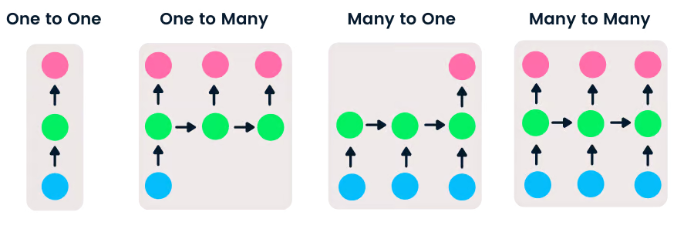

### RNN with A Single Neuron
* build the computation graph for a single-layer RNN using PyTorch

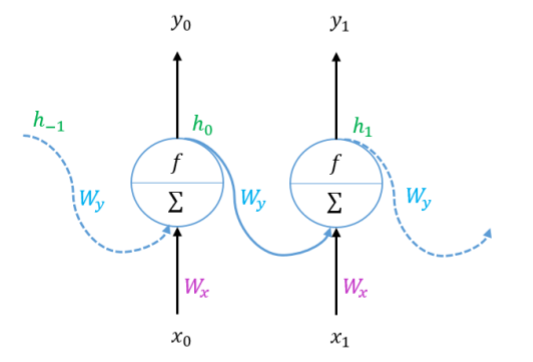

* This code implements a very simple Recurrent Neural Network (RNN) using PyTorch:

**Key Points:**
* Two weight matrices are created:

    * Wx: connects the current input to the hidden neuron.

    * Wy: connects the previous hidden output to the current hidden neuron.

* Bias (b) is also added.

* tanh activation function is used for nonlinearity.

**Forward Process:**
* Step 1: Take the first input (X0) → calculate hidden output (Y0).

* Step 2: Use the hidden output (Y0) and the second input (X1) → calculate new hidden output (Y1).

`So at each time step, the hidden state depends on both the current input and the previous hidden state.`

**Example:**
* You have 4 samples (instances).

* Each sample has 2 input steps (X0 and X1).

* The RNN processes the first input and remembers it while processing the second input.

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
class SingleRNN(nn.Module):
    def __init__(self, n_inputs, n_neurons):
        super(SingleRNN, self).__init__()
        
        self.Wx = torch.randn(n_inputs, n_neurons) # 4 X 1
        self.Wy = torch.randn(n_neurons, n_neurons) # 1 X 1
        
        self.b = torch.zeros(1, n_neurons) # 1 X 4
        
    def forward(self, X0, X1):
        self.Y0 = torch.tanh(torch.mm(X0, self.Wx) + self.b) # 4 X 1
        
        self.Y1 = torch.tanh(torch.mm(self.Y0, self.Wy) +
                            torch.mm(X1, self.Wx) + self.b) # 4 X 1
        
        return self.Y0, self.Y1
    

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
class SingleRNN(nn.Module):
    def __init__(self, n_inputs, n_neurons):
        super(SingleRNN, self).__init__()
        
        self.Wx = torch.randn(n_inputs, n_neurons) # 4 X 1
        self.Wy = torch.randn(n_neurons, n_neurons) # 1 X 1
        
        self.b = torch.zeros(1, n_neurons) # 1 X 4
        
    def forward(self, X0, X1 ,X2):
        self.Y0 = torch.tanh(torch.mm(X0, self.Wx) + self.b) # 4 X 1
        
        self.Y1 = torch.tanh(torch.mm(self.Y0, self.Wy) +
                            torch.mm(X1, self.Wx) + self.b) # 4 X 1
        
        self.Y2 = torch.tanh(torch.mm(self.Y1, self.Wy) + 
                             torch.mm(X2, self.Wx) + self.b)

        
        return self.Y0, self.Y1, self.Y2

CN: adding a new time step, we keep the same model and we just pass the additional (X2) input into the model with the previous output(Y2) both into the same model which produces the new output(Y2)

**Explaining the Simple One-Layer, One-Neuron RNN**
* This RNN has one layer and one neuron.

* Two weight matrices are initialized:

    * Wx: connects the current input to the neuron.

    * Wy: connects the previous output back to the neuron (recurrent connection).

* A bias (b) is added to shift the activation function output.

* The activation function used is tanh, which helps handle negative and positive values.

* The forward pass produces two outputs:

    * First output (Y₀) from the first input (X₀).

    * Second output (Y₁) from the second input (X₁) and the first output (Y₀).

**About the Inputs:**
* We have 4 instances (like 4 samples).

* Each instance contains two time steps (X₀ and X₁).

* The RNN processes each step sequentially, remembering the previous output.

`In short: the RNN combines current input and past output at each time step to produce the new output!`

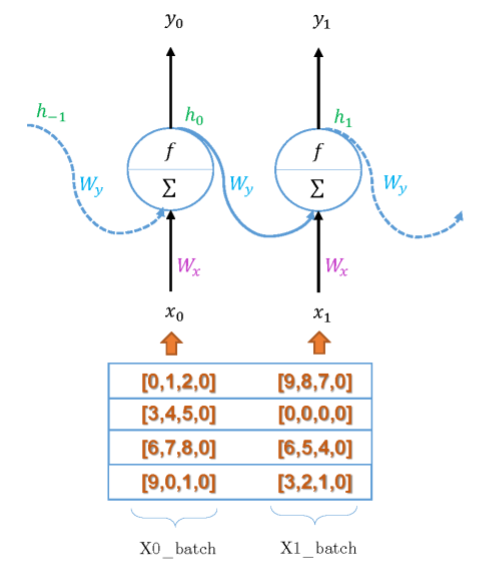

In [4]:
N_INPUT = 4
N_NEURONS = 1

X0_batch = torch.tensor([[0,1,2,0], [3,4,5,0], 
                         [6,7,8,0], [9,0,1,0]],
                        dtype = torch.float) #t=0 => 4 X 4

X1_batch = torch.tensor([[9,8,7,0], [0,0,0,0], 
                         [6,5,4,0], [3,2,1,0]],
                        dtype = torch.float) #t=1 => 4 X 4

model = SingleRNN(N_INPUT, N_NEURONS)

Y0_val, Y1_val = model(X0_batch, X1_batch)

print(Y0_val)
print(Y1_val)

tensor([[-0.8418],
        [-1.0000],
        [-1.0000],
        [-1.0000]])
tensor([[-1.0000],
        [-0.5294],
        [-1.0000],
        [-1.0000]])


### Increasing Neurons in RNN Layer
* So far, we built an RNN with only one neuron.

* Now, we want to expand it to support multiple neurons (n neurons) in the RNN layer.

* Good news: the architecture stays the same — we already set up the code to handle any number of neurons!

* What changes:

    * The size of the output grows because now each time step produces n outputs (one from each neuron).

`In short: We move from a single output at each step to a vector of outputs — one for each neuron!`

### Quick Example:
| Before (Single Neuron) | After (Multiple Neurons) |
|-------------------------|---------------------------|
| Output Y₀: 1 number      | Output Y₀: n numbers (vector) |
| Output Y₁: 1 number      | Output Y₁: n numbers (vector) |

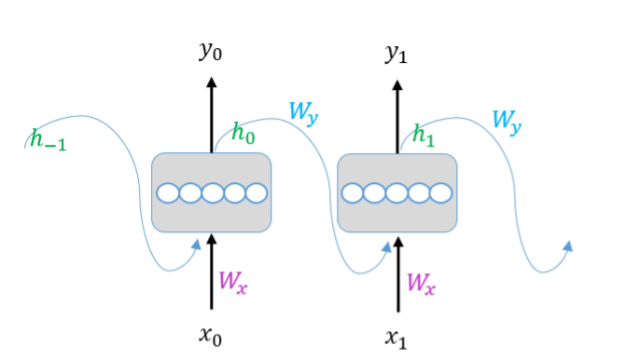


In [5]:
class BasicRNN(nn.Module):
    def __init__(self, n_inputs, n_neurons):
        super(BasicRNN, self).__init__()
        
        self.Wx = torch.randn(n_inputs, n_neurons) # n_inputs X n_neurons
        self.Wy = torch.randn(n_neurons, n_neurons) # n_neurons X n_neurons
        
        self.b = torch.zeros(1, n_neurons) # 1 X n_neurons
    
    def forward(self, X0, X1):
        self.Y0 = torch.tanh(torch.mm(X0, self.Wx) + self.b) # batch_size X n_neurons
        
        self.Y1 = torch.tanh(torch.mm(self.Y0, self.Wy) +
                            torch.mm(X1, self.Wx) + self.b) # batch_size X n_neurons
        
        return self.Y0, self.Y1

In [6]:
N_INPUT = 3 # number of features in input
N_NEURONS = 5 # number of units in layer

X0_batch = torch.tensor([[0,1,2], [3,4,5], 
                         [6,7,8], [9,0,1]],
                        dtype = torch.float) #t=0 => 4 X 3

X1_batch = torch.tensor([[9,8,7], [0,0,0], 
                         [6,5,4], [3,2,1]],
                        dtype = torch.float) #t=1 => 4 X 3

model = BasicRNN(N_INPUT, N_NEURONS)

Y0_val, Y1_val = model(X0_batch, X1_batch)

In [7]:
print(Y0_val)
print(Y1_val)

tensor([[-0.1288, -0.5099, -0.7959, -0.9591, -0.9956],
        [ 0.1581,  0.7232, -1.0000, -1.0000, -1.0000],
        [ 0.4206,  0.9834, -1.0000, -1.0000, -1.0000],
        [-0.9623,  1.0000,  0.6933, -1.0000,  0.9962]])
tensor([[ 0.8152,  0.9997, -1.0000, -1.0000, -1.0000],
        [ 0.7553, -0.0189,  0.9305, -0.8536,  0.8824],
        [ 0.9697,  0.9989, -1.0000, -1.0000, -0.9995],
        [-0.6499,  0.9979, -0.9999, -0.9998,  0.6578]])


## PyTorch Built-in RNN Cell

* In the previous RNN, we had to manually calculate the hidden state at each time step, which can get messy for large sequences.

* To make this easier, PyTorch provides a built-in RNNCell class that automatically manages:

 * Weights and biases,

 * Forward computations for each time step.

`How RNNCell Works:`

* nn.RNNCell(input_size, hidden_size) creates a mini RNN that processes one step at a time.

* You just feed the input and hidden state into it — it gives you the new hidden state.

* You can use it in a for-loop over time steps to process sequences easily.


**Example code**

In [8]:
rnn = nn.RNNCell(3, 5) # n_input X n_neurons

X_batch = torch.tensor([[[0,1,2], [3,4,5], 
                         [6,7,8], [9,0,1]],
                        [[9,8,7], [0,0,0], 
                         [6,5,4], [3,2,1]]
                       ], dtype = torch.float) # X0 and X1

hx = torch.randn(4, 5) # m X n_neurons
output = []

# for each time step
for i in range(2):
    hx = rnn(X_batch[i], hx)
    output.append(hx)

print(output)

[tensor([[-0.1585, -0.8802,  0.1378, -0.7158,  0.4760],
        [-0.7777, -0.9909, -0.9703, -0.9933, -0.6320],
        [-0.9645, -0.9994, -0.9995, -0.9999, -0.8200],
        [ 0.9669, -0.9912, -0.9991,  0.9084, -0.9991]],
       grad_fn=<TanhBackward0>), tensor([[-0.8794, -1.0000, -0.9990, -0.9996, -0.7857],
        [-0.0504, -0.4849, -0.3759,  0.5647, -0.1472],
        [-0.6100, -0.9989, -0.9952, -0.9361, -0.5127],
        [ 0.2188, -0.8129, -0.9679,  0.1722, -0.9683]],
       grad_fn=<TanhBackward0>)]


* This automatically computes everything behind the scenes!

* Much cleaner and simpler than manually handling Wx, Wy, and b!

**Formal Class Structure**

In [9]:
class CleanBasicRNN(nn.Module):
    def __init__(self, batch_size, n_inputs, n_neurons):
        super(CleanBasicRNN, self).__init__()
        
        self.rnn = nn.RNNCell(n_inputs, n_neurons)
        self.hx = torch.randn(batch_size, n_neurons) # initialize hidden state
        
    def forward(self, X):
        output = []

        # for each time step
        for i in range(2):
            self.hx = self.rnn(X[i], self.hx)
            output.append(self.hx)
        
        return output, self.hx

In [10]:
FIXED_BATCH_SIZE = 4 # our batch size is fixed for now
N_INPUT = 3
N_NEURONS = 5

X_batch = torch.tensor([[[0,1,2], [3,4,5], 
                         [6,7,8], [9,0,1]],
                        [[9,8,7], [0,0,0], 
                         [6,5,4], [3,2,1]]
                       ], dtype = torch.float) # X0 and X1


model = CleanBasicRNN(FIXED_BATCH_SIZE, N_INPUT, N_NEURONS)
output_val, states_val = model(X_batch)
print(output_val) # contains all output for all timesteps
print(states_val) # contain values for final state or final timestep, i.e., t=1

[tensor([[-0.9015,  0.7310,  0.7622, -0.2838, -0.4875],
        [ 0.1277,  0.8570,  0.9989, -0.0011, -0.5031],
        [-0.1604,  0.9624,  1.0000,  0.9069, -0.5026],
        [ 0.9373, -0.9797,  0.9852,  0.9716,  0.9924]],
       grad_fn=<TanhBackward0>), tensor([[ 0.6558,  0.9379,  1.0000,  0.9773, -0.4182],
        [ 0.3939, -0.4733,  0.6647, -0.3121, -0.4774],
        [ 0.4188,  0.7139,  1.0000,  0.8951, -0.4265],
        [-0.4384,  0.4329,  0.9856, -0.7793, -0.1705]],
       grad_fn=<TanhBackward0>)]
tensor([[ 0.6558,  0.9379,  1.0000,  0.9773, -0.4182],
        [ 0.3939, -0.4733,  0.6647, -0.3121, -0.4774],
        [ 0.4188,  0.7139,  1.0000,  0.8951, -0.4265],
        [-0.4384,  0.4329,  0.9856, -0.7793, -0.1705]],
       grad_fn=<TanhBackward0>)


**_Summary:_**
* Instead of manually coding how the hidden states are updated, PyTorch’s RNNCell automates it neatly — keeping our code short, clean, and scalable!

## Multi-layers RNN

We want to stack 3 RNN layers — meaning the output of the first RNN goes into the second, and the output of the second goes into the third.

**Conceptually:**
For each time step:

1. First layer: `hx1 = RNNCell1(X[i], hx1)`
2. Second layer: `hx2 = RNNCell2(hx1, hx2)`
3. Third layer: `hx3 = RNNCell3(hx2, hx3)`

**Full Code for 3-layer RNN**

In [1]:
import torch
import torch.nn as nn

class CleanMultiLayerRNN(nn.Module):
    def __init__(self, batch_size, n_inputs, n_neurons):
        super(CleanMultiLayerRNN, self).__init__()

        # Define three RNN cells
        self.rnn1 = nn.RNNCell(n_inputs, n_neurons)
        self.rnn2 = nn.RNNCell(n_neurons, n_neurons)
        self.rnn3 = nn.RNNCell(n_neurons, n_neurons)

        # Initial hidden states for each layer
        self.hx1 = torch.randn(batch_size, n_neurons)
        self.hx2 = torch.randn(batch_size, n_neurons)
        self.hx3 = torch.randn(batch_size, n_neurons)

    def forward(self, X):
        output = []

        # loop over time steps
        for i in range(2):  # or however many time steps
            self.hx1 = self.rnn1(X[i], self.hx1)
            self.hx2 = self.rnn2(self.hx1, self.hx2)
            self.hx3 = self.rnn3(self.hx2, self.hx3)

            output.append(self.hx3)  # typically output last layer hidden state
        
        return output, self.hx3


### 🧠 Key Changes:
| Part | Before (Single Layer) | After (Three Layers) |
|:----|:----------------------|:---------------------|
| RNN Cells | 1 cell: `self.rnn` | 3 cells: `self.rnn1`, `self.rnn2`, `self.rnn3` |
| Hidden States | 1 hidden: `self.hx` | 3 hiddens: `self.hx1`, `self.hx2`, `self.hx3` |
| Forward | 1 update per time step | 3 updates per time step, passing hidden through layers |

In [2]:
# Settings
batch_size = 4
n_inputs = 5
n_neurons = 6
time_steps = 2

# Create random dummy input (time_steps, batch_size, n_inputs)
X = torch.randn(time_steps, batch_size, n_inputs)

# Instantiate the model
model = CleanMultiLayerRNN(batch_size, n_inputs, n_neurons)

# Pass input through the model
outputs, final_hidden = model(X)

# Print results
print("=== Outputs at each time step ===")
for idx, out in enumerate(outputs):
    print(f"Time step {idx}:")
    print(out)
    print("-" * 40)

print("=== Final hidden state ===")
print(final_hidden)


=== Outputs at each time step ===
Time step 0:
tensor([[ 0.0246,  0.9446, -0.9086,  0.4350, -0.4795,  0.9395],
        [-0.7201,  0.4906, -0.5943,  0.8419, -0.5365,  0.8716],
        [-0.6049, -0.3203, -0.7651,  0.5965, -0.5124, -0.5357],
        [-0.7048, -0.6276, -0.1617,  0.2759, -0.5536, -0.0736]],
       grad_fn=<TanhBackward0>)
----------------------------------------
Time step 1:
tensor([[-0.6726,  0.3726, -0.4083,  0.6491, -0.6881,  0.5061],
        [-0.8864, -0.0818,  0.1400,  0.4714, -0.6651,  0.1714],
        [-0.7765,  0.4985,  0.2584,  0.6007, -0.4089,  0.2025],
        [-0.6792,  0.5430,  0.0519,  0.2756, -0.6488,  0.1167]],
       grad_fn=<TanhBackward0>)
----------------------------------------
=== Final hidden state ===
tensor([[-0.6726,  0.3726, -0.4083,  0.6491, -0.6881,  0.5061],
        [-0.8864, -0.0818,  0.1400,  0.4714, -0.6651,  0.1714],
        [-0.7765,  0.4985,  0.2584,  0.6007, -0.4089,  0.2025],
        [-0.6792,  0.5430,  0.0519,  0.2756, -0.6488,  0.1167

### RNN for Image Classification

**Now that you know:**

* How to build a basic RNN manually, and

* How to use PyTorch’s built-in RNNCell,

`let’s build something bigger: an image classifier using the MNIST dataset!`

**What is MNIST?**
* MNIST is a famous dataset of handwritten digits (0 to 9).

* Each sample is a 28x28 grayscale image of a single number.

**Our Goal:**

* Train an RNN to predict which number (0–9) is shown in each image!

**What Changes Here?**
* We will use the full nn.RNN module, not RNNCell.

* Why?

    * nn.RNN allows multiple layers (deep RNNs)!

    * It automatically handles the sequence processing across time steps.

**Plan:**
1. Import MNIST Dataset:

    * Download images and labels.

    * Split into training and testing sets.

    * Apply transformations (like converting images into tensors).

2. Feed each image into an RNN:

    * Treat the image as a sequence of 28 rows (each row has 28 pixels).

    * So each row becomes a time step for the RNN.

**In short:**
`Instead of looking at the whole image at once, we let the RNN read the image row-by-row like reading a sentence!`


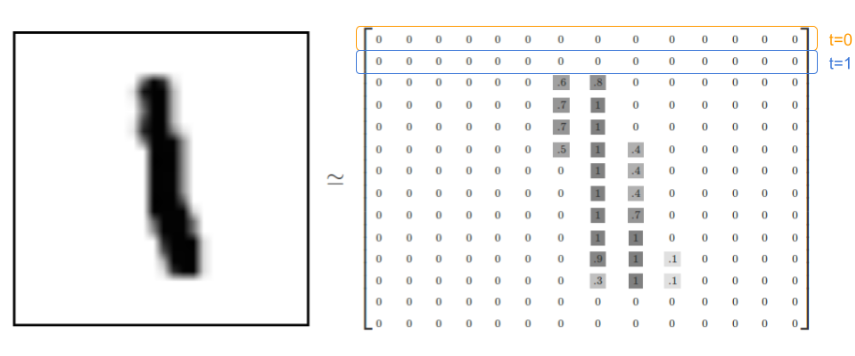

In [11]:
import torchvision
import torchvision.transforms as transforms
BATCH_SIZE = 64

# list all transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

# download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

# download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

c:\Users\rsole\anaconda3\envs\cuda_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:00<00:00, 15705957.49it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 927482.40it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:00<00:00, 6027114.95it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 4620550.27it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



**Preparing the MNIST Dataset for RNN Training**
* The previous code loads and prepares the MNIST dataset for training.

* The dataset is divided into:

    * Training set (for learning)

    * Testing set (for evaluating)

**Why is Batch Size Important?**
* We set a batch size because trainloader and testloader are iterators.

* Iterators deliver data in small groups (minibatches), not all at once.

* Minibatches make:

    * Training faster and more efficient.

    * Memory usage lower.

    * Gradient updates smoother (instead of noisy updates on every single sample).

`Instead of giving the RNN one image at a time, we feed a group of images (a batch) in each step to speed up and stabilize training!`



#### Exloring the dataset

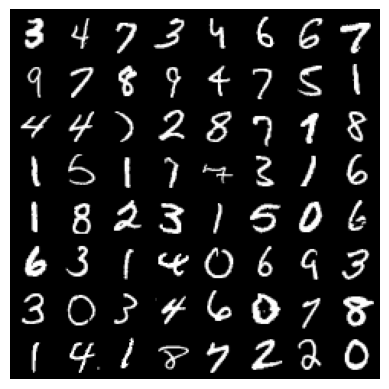

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

# functions to show an image
def imshow(img):
    # img = img / 2 + 0.5  # if you had normalized images, you might unnormalize here
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')  # optionally hide axis
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))


#### Model

In [18]:
# parameters 
N_STEPS = 28
N_INPUTS = 28
N_NEURONS = 150
N_OUTPUTS = 10
N_EPHOCS = 10

And finally, here is a figure of the RNN-based classification model we are building:

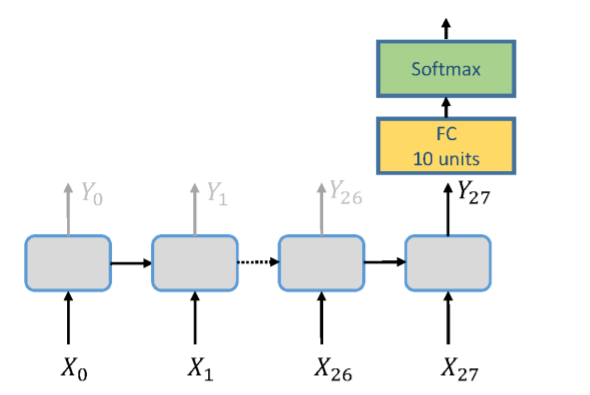

In [16]:
class ImageRNN(nn.Module):
    def __init__(self, batch_size, n_steps, n_inputs, n_neurons, n_outputs):
        super(ImageRNN, self).__init__()
        
        self.n_neurons = n_neurons
        self.batch_size = batch_size
        self.n_steps = n_steps
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        
        self.basic_rnn = nn.RNN(self.n_inputs, self.n_neurons) 
        
        self.FC = nn.Linear(self.n_neurons, self.n_outputs)
        
    def init_hidden(self,):
        # (num_layers, batch_size, n_neurons)
        return (torch.zeros(1, self.batch_size, self.n_neurons))
        
    def forward(self, X):
        # transforms X to dimensions: n_steps X batch_size X n_inputs
        X = X.permute(1, 0, 2) 
        
        self.batch_size = X.size(1)
        self.hidden = self.init_hidden()
        
        # lstm_out => n_steps, batch_size, n_neurons (hidden states for each time step)
        # self.hidden => 1, batch_size, n_neurons (final state from each lstm_out)
        lstm_out, self.hidden = self.basic_rnn(X, self.hidden)      
        out = self.FC(self.hidden)
        
        return out.view(-1, self.n_outputs) # batch_size X n_output

**The ImageRNN model is doing the following:**

* The initialization function __init__(...) declares a few variables, and then a basic RNN layer basic_rnn followed by a fully-connected layer self.FC.

* The init_hidden function initializes hidden weights with zero values. The forward function accepts an input of size n_steps X batch_size X n_neurons. Then the data flows through the RNN layer and then through the fully-connected layer.

*The output are the log probabilities of the model.

#### Testing the model with some samples

In [19]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Optional: move to GPU if needed
# images = images.to(device)

model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)

# Make sure input is reshaped correctly
logits = model(images.reshape(-1, 28, 28))

# Print first 10 logits
print(logits[0:10])


tensor([[-4.5101e-02, -3.2920e-02,  5.7520e-02, -4.8569e-02, -4.4643e-04,
         -1.3884e-02,  7.0916e-02,  9.8714e-02,  1.3466e-02, -6.1446e-02],
        [-1.9180e-02, -4.6655e-02,  7.3434e-02, -5.6256e-02,  2.3212e-02,
         -8.3355e-03,  7.2302e-02,  9.7061e-02,  6.1764e-03, -5.4643e-02],
        [-5.7934e-03, -1.4766e-02,  5.2023e-02, -2.2537e-02, -9.0664e-03,
         -3.5482e-03,  7.1604e-02,  1.1071e-01,  6.2040e-03, -5.4278e-02],
        [-2.5330e-02, -5.3855e-02,  5.0799e-02, -4.8440e-02,  3.1387e-02,
          1.2635e-02,  6.9007e-02,  1.0193e-01, -6.1225e-03, -5.7546e-02],
        [-9.5127e-03, -4.3845e-02,  7.4805e-02, -5.1519e-02,  1.4202e-02,
         -3.2310e-03,  7.3498e-02,  8.0915e-02, -5.4196e-05, -4.1708e-02],
        [-1.2432e-02, -3.5160e-02,  8.2012e-02, -4.9725e-02,  1.9442e-02,
         -6.8488e-03,  7.1469e-02,  8.0602e-02,  1.7308e-02, -5.6863e-02],
        [-1.7867e-02, -4.1498e-02,  4.5350e-02, -2.1416e-02, -7.7265e-03,
         -3.7799e-03,  5.8552e-0

### Training 

Before training a deep learning model, we need to set up a few important things:

1. Choose a Device
    * Use torch.device(...) to choose GPU if available, otherwise default to CPU.

    * This makes training much faster if a GPU is present!

2.  Create the Model
    * Instantiate the model (e.g., ImageRNN(...)) with the right parameters (like input size, hidden size, number of classes).

    * Move the model to the selected device.

3. Define the Loss Function
    * Use nn.CrossEntropyLoss():

        * It combines Log Softmax and Negative Log Likelihood into a single function.

        * It expects:

            * Model outputs (logits)

            * True labels (targets)

4. Choose an Optimizer
    * Example: optim.Adam(model.parameters(), lr=0.001)

    * The optimizer updates the model’s weights during training based on the loss.

    * Other options: optim.SGD, optim.RMSprop, etc.

5. Define an Accuracy Function
    * A helper function (get_accuracy(...)) computes how many predictions are correct.

    * Good for monitoring performance during training!




In [21]:
import torch.optim as optim

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Model instance
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [22]:
for epoch in range(N_EPHOCS):  # loop over the dataset multiple times
    train_running_loss = 0.0
    train_acc = 0.0
    model.train()
    
    # TRAINING ROUND
    for i, data in enumerate(trainloader):
         # zero the parameter gradients
        optimizer.zero_grad()
        
        # reset hidden states
        model.hidden = model.init_hidden() 
        
        # get the inputs
        inputs, labels = data
        inputs = inputs.view(-1, 28,28) 

        # forward + backward + optimize
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(outputs, labels, BATCH_SIZE)
         
    model.eval()
    print('Epoch:  %d | Loss: %.4f | Train Accuracy: %.2f' 
          %(epoch, train_running_loss / i, train_acc/i))

Epoch:  0 | Loss: 0.7186 | Train Accuracy: 76.83
Epoch:  1 | Loss: 0.3107 | Train Accuracy: 90.99
Epoch:  2 | Loss: 0.2324 | Train Accuracy: 93.42
Epoch:  3 | Loss: 0.1868 | Train Accuracy: 94.71
Epoch:  4 | Loss: 0.1714 | Train Accuracy: 95.25
Epoch:  5 | Loss: 0.1500 | Train Accuracy: 95.85
Epoch:  6 | Loss: 0.1376 | Train Accuracy: 96.16
Epoch:  7 | Loss: 0.1360 | Train Accuracy: 96.12
Epoch:  8 | Loss: 0.1199 | Train Accuracy: 96.66
Epoch:  9 | Loss: 0.1170 | Train Accuracy: 96.77


#### Accuracy

In [23]:
test_acc = 0.0
for i, data in enumerate(testloader, 0):
    inputs, labels = data
    inputs = inputs.view(-1, 28, 28)

    outputs = model(inputs)

    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 96.22


### Limitations of Simple RNNs
While Simple RNNs are powerful, they suffer from two major problems during training:

1. Vanishing Gradient Problem
    * The gradient (used to update the model) becomes very, very small.

    * Result: Model stops learning because updates to weights are too tiny.

2. Exploding Gradient Problem
    * The gradient becomes extremely large.

    * Result: Model becomes unstable — the weights grow too big, leading to bad predictions and longer training.

**How to Solve These Problems?**
* Simplify the model:

    * Reduce the number of hidden layers.

* Use smarter architectures:

    * Use _LSTM_ (Long Short-Term Memory) or _GRU_ (Gated Recurrent Unit) instead of a basic RNN.

    * These are specially designed to handle long sequences better without vanishing or exploding gradients.